Before starting, need to install packages of python.

Install in Terminal:

```bash
pip install -r requirements.txt
```

* `pydicom`: To read DCM file
* `numpy` and `scipy`: To calculate
* `matplotlib`: To plot the image 


In [10]:
from pydicom import dcmread
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [11]:
# Read DCM
filename = '012_se_mc/012-001.dcm'
ds = dcmread(filename)

print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.32.35063.2014102921213020949761792
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VB17A'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20141029'
(0008, 0013) Instance Creation Time              TM: '212130.593000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID  

[DCM Table](https://www.dicomlibrary.com/dicom/dicom-tags/)

In the table, show you the information of DCM.

    (0018,0080)	DS	Repetition Time	
    (0018,0081)	DS	Echo Time

Echo time:  13.6
shape:  (256, 256)
data type:  uint16


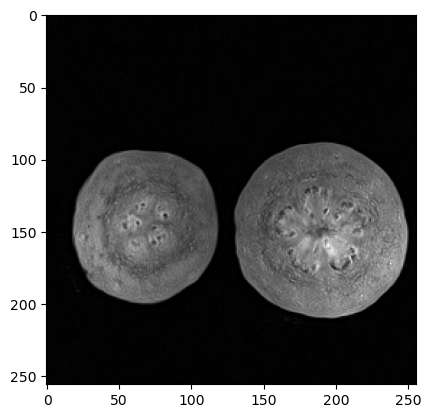

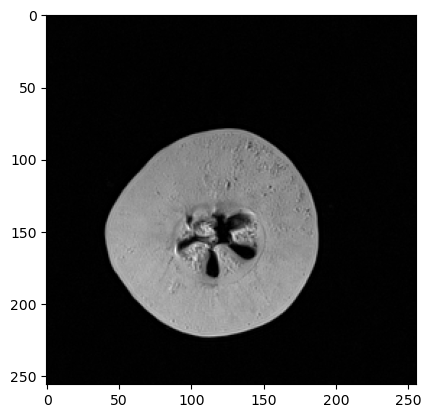

In [12]:
# Echo time
print('Echo time: ', ds[0x18,0x81].value)

# Information of image
print('shape: ',ds.pixel_array.shape)
print('data type: ',ds.pixel_array.dtype)

# matplotlib to plot the DCM
plt.imshow(ds.pixel_array,cmap='gray')
plt.savefig("T2A.png")
plt.show()
ds = dcmread('012_se_mc/012-002.dcm')
plt.imshow(ds.pixel_array,cmap='gray')
plt.savefig("T2B.png")
plt.show()


In [13]:
# In the folder, there are two kinds of images.
imgA = np.zeros((256,256,12))
imgB = np.zeros((256,256,12))
echoTime = list()

for i in range(12):
    # Read the DCM
    if i < 5 :
        filenameA=('012_se_mc/012-00'+str(2*i+1)+'.dcm')
    else:
        filenameA=('012_se_mc/012-0'+str(2*i+1)+'.dcm')
    
    if i < 4 :
        filenameB=('012_se_mc/012-00'+str(2*i+2)+'.dcm')
    else:
        filenameB=('012_se_mc/012-0'+str(2*i+2)+'.dcm')
    
    # Save image of DCM
    imgA[:,:,i]=dcmread(filenameA).pixel_array
    imgB[:,:,i]=dcmread(filenameB).pixel_array
    print('File Name: ',filenameA,filenameB)
    # Save echo time of DMC
    echoTime.append(dcmread(filenameA)[0x18,0x81].value)
    print('Echo Time: ',dcmread(filenameA)[0x18,0x81].value, dcmread(filenameB)[0x18,0x81].value)

File Name:  012_se_mc/012-001.dcm 012_se_mc/012-002.dcm
Echo Time:  13.6 13.6
File Name:  012_se_mc/012-003.dcm 012_se_mc/012-004.dcm
Echo Time:  27.2 27.2
File Name:  012_se_mc/012-005.dcm 012_se_mc/012-006.dcm
Echo Time:  40.8 40.8
File Name:  012_se_mc/012-007.dcm 012_se_mc/012-008.dcm
Echo Time:  54.4 54.4
File Name:  012_se_mc/012-009.dcm 012_se_mc/012-010.dcm
Echo Time:  68 68
File Name:  012_se_mc/012-011.dcm 012_se_mc/012-012.dcm
Echo Time:  81.6 81.6
File Name:  012_se_mc/012-013.dcm 012_se_mc/012-014.dcm
Echo Time:  95.2 95.2
File Name:  012_se_mc/012-015.dcm 012_se_mc/012-016.dcm
Echo Time:  108.8 108.8
File Name:  012_se_mc/012-017.dcm 012_se_mc/012-018.dcm
Echo Time:  122.4 122.4
File Name:  012_se_mc/012-019.dcm 012_se_mc/012-020.dcm
Echo Time:  136 136
File Name:  012_se_mc/012-021.dcm 012_se_mc/012-022.dcm
Echo Time:  149.6 149.6
File Name:  012_se_mc/012-023.dcm 012_se_mc/012-024.dcm
Echo Time:  163.2 163.2


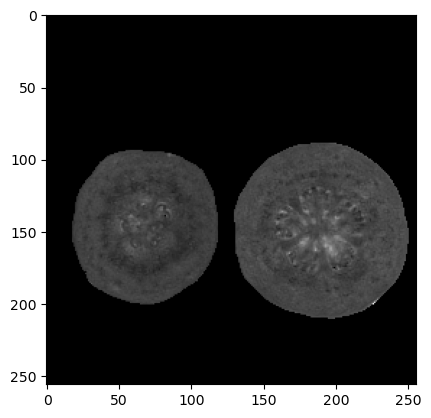

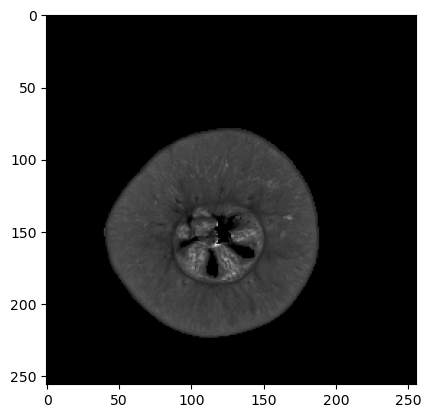

In [14]:
# T2-Mapping
T2mapA = np.zeros((256,256,2))
T2mapB = np.zeros((256,256,2))

def Mapping(img, echoTime, T2map,outputFile):
    for row in range(256):
        for colum in range(256):
            # if value of image < 270, to skip
            if img[row,colum,0] < 270: continue 
            coef=curve_fit(lambda t,a,b: a*np.exp(-t/b),  echoTime,  (img[row,colum,:]), p0=(img[row,colum,0],echoTime[5]))
            #coef = [M0, TE]
            T2map[row,colum,:] = coef[0]
            #print(TE)

    plt.imshow(T2map[:,:,1],cmap='gray')
    plt.savefig("images/"+outputFile)
    plt.show()

Mapping(imgA, echoTime, T2mapA, "T2A_Mapping.png")
Mapping(imgB, echoTime, T2mapB, "T2B_Mapping.png")

# Result

Using `matplotlib` to show two picture of result.

* One: shows the curve of the pixel in **T2-image**.
* Another: shows two curves: **Orignal** and **curve-fitting**.

In the function **`T2_plot`**:

* img: orignal image
* T2map: image after T2-Mapping
* echoTime
* pixel: the pixel of image you want to show
* outputFile: the output file name

In [15]:
# Show the result by plot
def T2_plot(img, T2map, echoTime, pixel, outputFile):
    row = pixel[0]
    colum = pixel[1]
    plt.plot(echoTime, img[row,colum,:])
    plt.title("T2 Image in pixel"+str(pixel))
    plt.xlabel("TE") 
    plt.ylabel("M")
    plt.savefig("images/"+outputFile)    
    plt.show()

    T2 = [T2map[row,colum,0]*np.exp(-x/T2map[row,colum,1]) for x in echoTime]
    plt.plot(echoTime, img[row,colum,:])
    plt.plot(echoTime, T2)

    plt.title("T2 Image in pixel"+str(pixel))
    plt.xlabel("TE") 
    plt.ylabel("M")
    plt.legend(['Orignal','Curve fitting'])
    plt.savefig("images/curve-"+outputFile) 
    plt.show()

ImageA & T2mapA


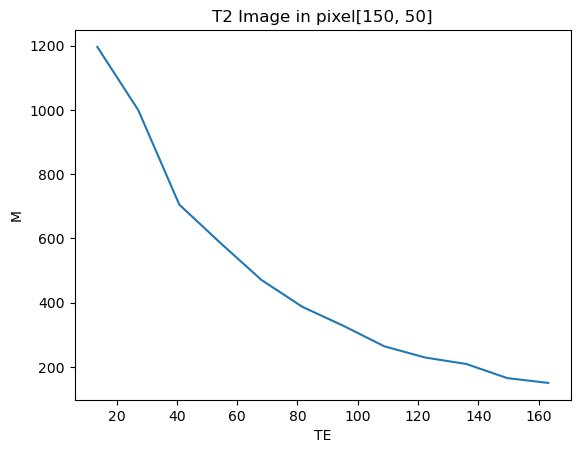

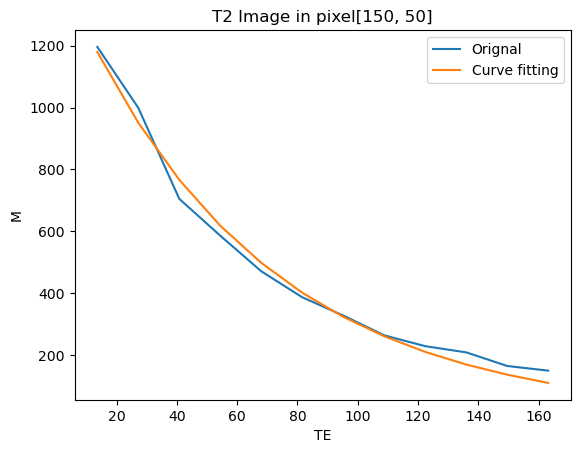

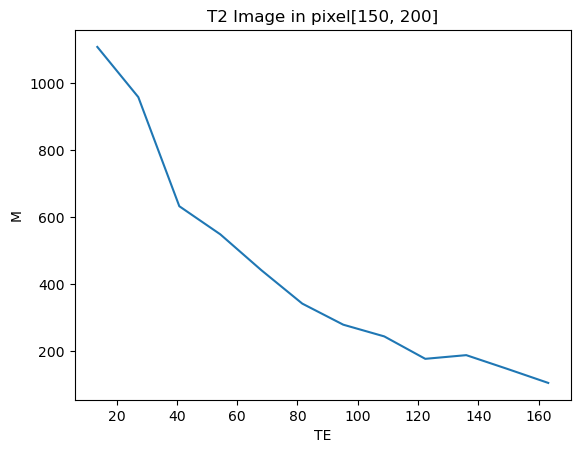

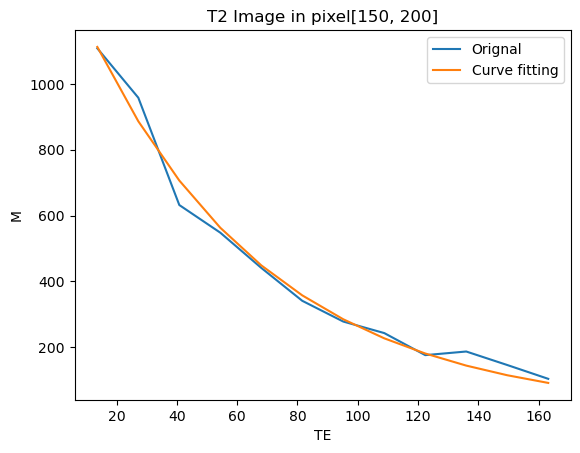

ImageB & T2mapB


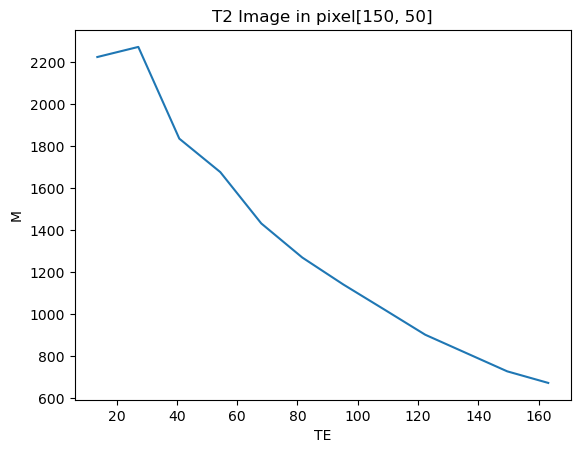

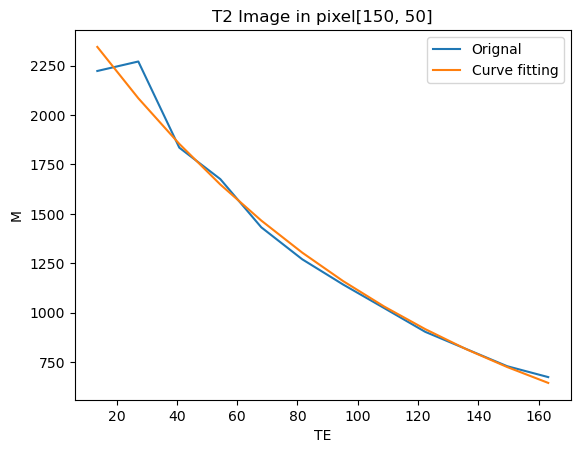

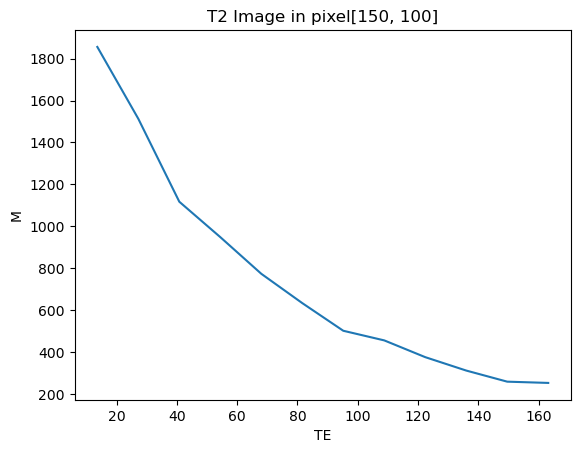

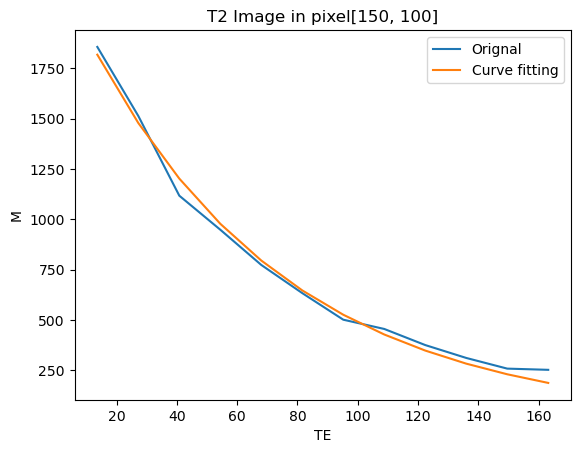

In [16]:
print("ImageA & T2mapA")
T2_plot(imgA, T2mapA, echoTime, [150,50], "imageA-150.50.png")
T2_plot(imgA, T2mapA, echoTime, [150,200], "imageA-150.200.png")

print("ImageB & T2mapB")
T2_plot(imgB, T2mapB, echoTime, [150,50], "imageB-150.50.png")
T2_plot(imgB, T2mapB, echoTime, [150,100], "imageB-150.100.png")